# 과제 1 - SVM 회귀


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVR
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.datasets import fetch_openml
import warnings

# 경고 메시지 무시
warnings.filterwarnings('ignore')


In [2]:
# 데이터 로드
boston = fetch_openml(name='boston', version=1, as_frame=False)
X, y = boston.data, boston.target

# 훈련 및 테스트 세트 분리
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


URLError: <urlopen error [WinError 10060] 연결된 구성원으로부터 응답이 없어 연결하지 못했거나, 호스트로부터 응답이 없어 연결이 끊어졌습니다>

In [10]:
boston = pd.read_csv('C:/Users/user/OneDrive/바탕 화면/boston/boston.csv')
X, y = boston.drop(columns=['MEDV']), boston['MEDV']

# 훈련 및 테스트 세트 분리
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [11]:
# 모델 생성
svr = LinearSVR(epsilon = 10)

# 모델 훈련
svr.fit(X_train, y_train)


LinearSVR(epsilon=10)

In [12]:
# 예측
y_pred = svr.predict(X_test)

# 성능 평가
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("Mean Squared Error:", mse)
print("R-squared:", r2)


Mean Squared Error: 59.68683993810022
R-squared: 0.1860935388044508


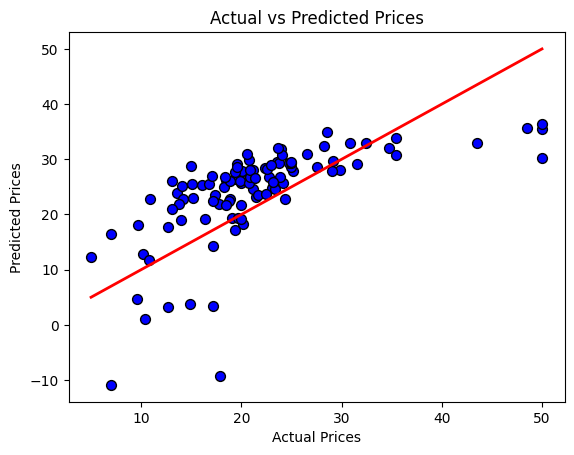

In [13]:
# 일부 feature를 사용하여 2D로 시각화
plt.scatter(y_test, y_pred, color='blue', edgecolor='k', s=50)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linewidth=2)
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual vs Predicted Prices')
plt.show()


## 과제 1-1 : epsilon 값을 변경하면서 LinearSVR을 적합한 후, 결과를 확인하고 이유를 분석해주세요!

성능 평가 후 평가지표와 그래프를 사용해서 분석해주세요

epsilon=0.01:
Mean Squared Error: 30.910597311991467
R-squared: 0.5784944403534391


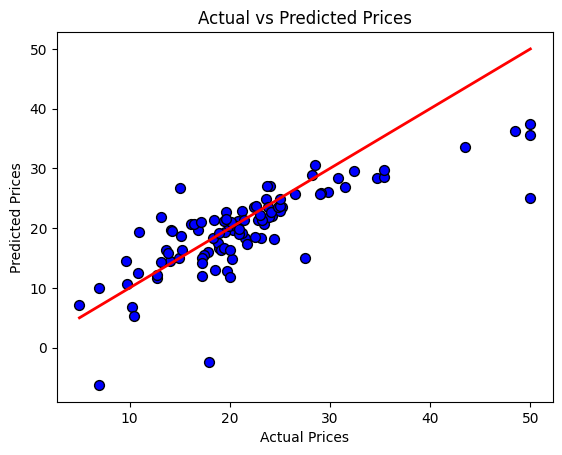

epsilon=0.1:
Mean Squared Error: 31.561637298949616
R-squared: 0.5696166768057052


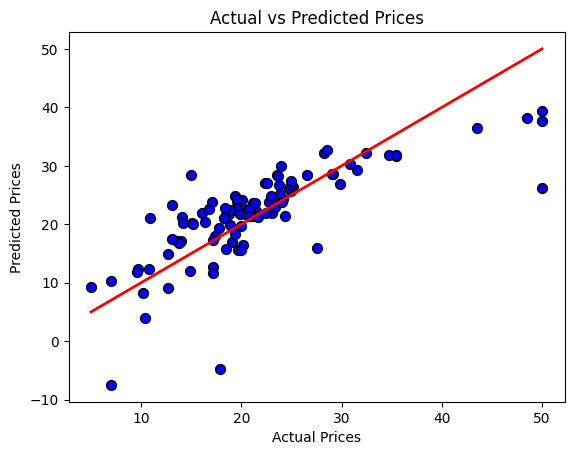

epsilon=1:
Mean Squared Error: 33.88615431212688
R-squared: 0.5379189119693353


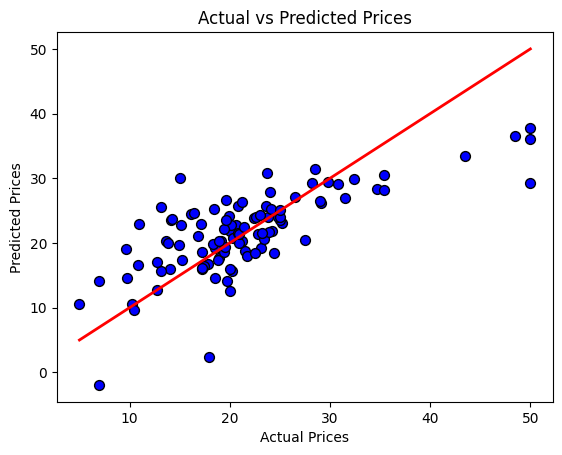

epsilon=10:
Mean Squared Error: 73.96668749947669
R-squared: -0.008630460776448245


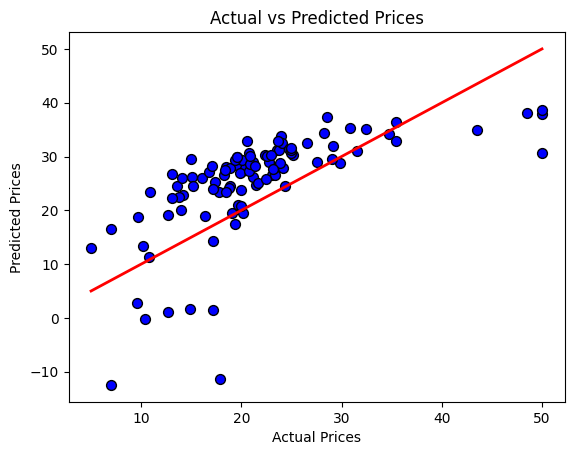

In [17]:
'''# 모델 생성
svr = LinearSVR(epsilon=) # Todo


# 모델 훈련
svr.fit(X_train, y_train)'''

epsilon_values = [0.01, 0.1, 1, 10] # Todo
MSE = []
R2 = []

for epsilon in epsilon_values:
    # 모델 생성
    svr= LinearSVR(epsilon=epsilon)

    # 모델 훈련
    svr.fit(X_train, y_train)

    # 예측
    y_pred = svr.predict(X_test)

    # 성능 평가
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    print(f"epsilon={epsilon}:")
    print("Mean Squared Error:", mse)
    print("R-squared:", r2)

    plt.scatter(y_test, y_pred, color='blue', edgecolor='k', s=50)
    plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linewidth=2)
    plt.xlabel('Actual Prices')
    plt.ylabel('Predicted Prices')
    plt.title('Actual vs Predicted Prices')
    plt.show()


In [97]:
# Todo

epsilon 값이 0.01로 가장 작을 때, 평균 제곱 오차가 가장 작아 실제값과 가깝게 예측함.\
실제로 그래프에서 데이터 분포의 중간에 회귀선이 존재함.\
SVR의 마진인 오차범위를 작게 설정하여 오차를 최소화했기 때문에 성능이 가장 좋은 것으로 생각됨.

# 과제 1-2 : SVM 분류

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score, classification_report
from sklearn.datasets import load_iris
import warnings

# 경고 메시지 무시
warnings.filterwarnings('ignore')


In [7]:
# 데이터 로드
iris = load_iris()
X, y = iris.data, iris.target

# 훈련 및 테스트 세트 분리
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


## 과제 1 - 2 trade-off 파라미터 C 값 설정

아래 수식처럼 C가 동작하는데, C가 작을수록 에러가 생겨도 가중치가 작기에 오버피팅을 막을 수 있음.

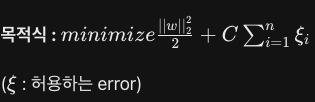


In [15]:
# 다양한 trade-off 파라미터 C 값 설정
C_values = [0.1,1,10,100,1000] # Todo
train_accuracies = []
test_accuracies = []

for C in C_values:
    # 모델 생성
    svc = LinearSVC(C=C)

    # 모델 훈련
    svc.fit(X_train, y_train)

    # 훈련 데이터와 테스트 데이터에 대한 예측
    y_train_pred = svc.predict(X_train)
    y_test_pred = svc.predict(X_test)

    # 정확도 계산
    train_acc = accuracy_score(y_train, y_train_pred)
    test_acc = accuracy_score(y_test, y_test_pred)

    # 결과 저장
    train_accuracies.append(train_acc)
    test_accuracies.append(test_acc)

    # 성능 출력
    print(f"C={C}:")
    print(f"Training Accuracy: {train_acc}")
    print(f"Testing Accuracy: {test_acc}")
    print(f"Classification Report:\n{classification_report(y_test, y_test_pred)}")
    print("-" * 50)


C=0.1:
Training Accuracy: 0.9666666666666667
Testing Accuracy: 1.0
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

--------------------------------------------------
C=1:
Training Accuracy: 0.975
Testing Accuracy: 1.0
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

----------------------

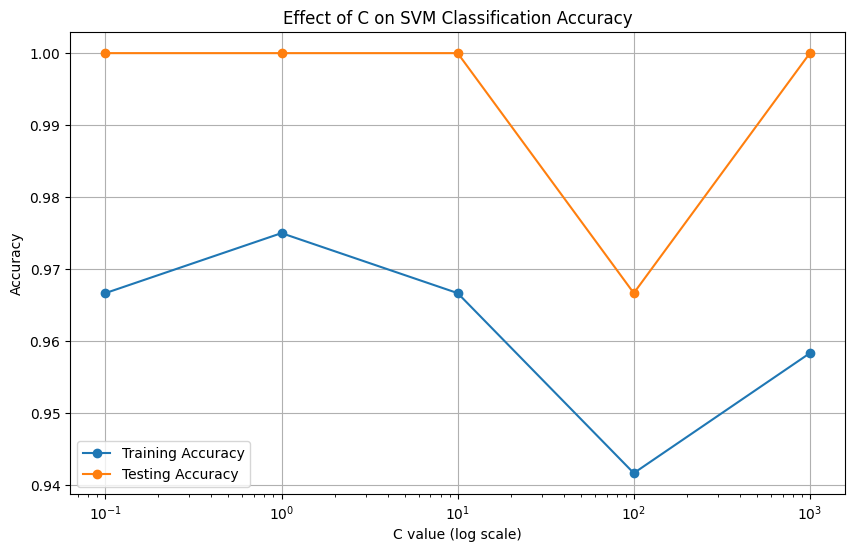

In [16]:
# C 값에 따른 정확도 시각화
plt.figure(figsize=(10, 6))
plt.plot(C_values, train_accuracies, marker='o', label='Training Accuracy')
plt.plot(C_values, test_accuracies, marker='o', label='Testing Accuracy')
plt.xscale('log')
plt.xlabel('C value (log scale)')
plt.ylabel('Accuracy')
plt.title('Effect of C on SVM Classification Accuracy')
plt.legend()
plt.grid(True)
plt.show()
